In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Merge crime and Weather data

In [ ]:
import pandas as pd
data_w= pd.read_csv("/content/drive/MyDrive/transformed_weather_data.csv", index_col=None)
data_c=pd.read_csv('/content/drive/MyDrive/merged_jan2010_Jul2023.csv', parse_dates=['Occurrence Date'], dtype={'Beat': str, 'ZIP Code': str, 'Offense Count': float, 'Incident': float})

<ipython-input-20-3121af9798ad>:3: DtypeWarning: Columns (1,6,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data_c=pd.read_csv('/content/drive/MyDrive/merged_jan2010_Jul2023.csv', parse_dates=['Occurrence Date'], dtype={'Beat': str, 'ZIP Code': str, 'Offense Count': float, 'Incident': float})


In [ ]:
data_w

,Unnamed: 0,Clear,Overcast,Partiallycloudy,Rain,Snow,cloudcover,datetime,dew,feelslike,...,sunrise,sunset,temp,tempmax,tempmin,uvindex,visibility,winddir,windgust,windspeed
0,0,0,0,1,0,0,47.7,2010-01-01,34.0,42.3,...,2010-01-01 07:16:59,2010-01-01 17:33:24,46.9,53.9,41.3,7.0,9.8,359.3,27.8,18.0
1,1,1,0,0,0,0,9.1,2010-02-01,30.9,43.1,...,2010-01-02 07:17:13,2010-01-02 17:34:07,46.3,53.7,40.1,6.0,9.6,93.7,16.1,11.6
2,2,0,0,1,0,0,78.6,2010-03-01,35.6,40.8,...,2010-01-03 07:17:25,2010-01-03 17:34:50,44.8,47.4,41.1,3.0,8.8,55.4,18.3,13.4
3,3,0,0,1,0,0,47.6,2010-04-01,29.4,35.2,...,2010-01-04 07:17:35,2010-01-04 17:35:35,41.8,46.4,36.2,7.0,9.6,346.2,25.0,18.4
4,4,1,0,0,0,0,4.4,2010-05-01,23.6,34.3,...,2010-01-05 07:17:44,2010-01-05 17:36:20,38.7,48.2,31.7,7.0,9.8,22.5,16.1,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,4986,0,0,1,0,0,21.0,2023-08-27,67.8,94.4,...,2023-08-27 06:55:52,2023-08-27 19:49:48,90.7,106.1,80.6,9.0,9.8,298.9,37.7,23.1
4987,4987,0,0,1,0,0,30.5,2023-08-28,69.3,90.9,...,2023-08-28 06:56:25,2023-08-28 19:48:40,87.0,95.5,78.9,10.0,9.9,21.8,21.9,14.6
4988,4988,0,0,1,0,0,32.5,2023-08-29,64.3,88.7,...,2023-08-29 06:56:57,2023-08-29 19:47:31,87.2,93.8,79.7,9.0,9.9,33.0,31.3,19.6
4989,4989,1,0,0,0,0,15.9,2023-08-30,57.1,86.5,...,2023-08-30 06:57:30,2023-08-30 19:46:22,87.4,96.7,78.0,9.0,9.9,35.9,30.1,15.2


In [ ]:
data_c_n=data_c[["Occurrence Date","Offense Count"]]
data_c_n=data_c_n.groupby(data_c_n['Occurrence Date']).count()
data_c_n=data_c_n.reset_index()
data_c_n

,Occurrence Date,Offense Count
0,2010-01-01,411
1,2010-01-02,347
2,2010-01-03,333
3,2010-01-04,386
4,2010-01-05,338
...,...,...
4955,2023-07-27,664
4956,2023-07-28,672
4957,2023-07-29,662
4958,2023-07-30,635


In [ ]:
data_c_n=data_c_n.rename(columns={"Occurrence Date": "datetime"})

In [ ]:
result = pd.concat([data_c_n, data_w], axis=1)
result

,datetime,Offense Count,Unnamed: 0,Clear,Overcast,Partiallycloudy,Rain,Snow,cloudcover,datetime,...,sunrise,sunset,temp,tempmax,tempmin,uvindex,visibility,winddir,windgust,windspeed
0,2010-01-01,411.0,0,0,0,1,0,0,47.7,2010-01-01,...,2010-01-01 07:16:59,2010-01-01 17:33:24,46.9,53.9,41.3,7.0,9.8,359.3,27.8,18.0
1,2010-01-02,347.0,1,1,0,0,0,0,9.1,2010-02-01,...,2010-01-02 07:17:13,2010-01-02 17:34:07,46.3,53.7,40.1,6.0,9.6,93.7,16.1,11.6
2,2010-01-03,333.0,2,0,0,1,0,0,78.6,2010-03-01,...,2010-01-03 07:17:25,2010-01-03 17:34:50,44.8,47.4,41.1,3.0,8.8,55.4,18.3,13.4
3,2010-01-04,386.0,3,0,0,1,0,0,47.6,2010-04-01,...,2010-01-04 07:17:35,2010-01-04 17:35:35,41.8,46.4,36.2,7.0,9.6,346.2,25.0,18.4
4,2010-01-05,338.0,4,1,0,0,0,0,4.4,2010-05-01,...,2010-01-05 07:17:44,2010-01-05 17:36:20,38.7,48.2,31.7,7.0,9.8,22.5,16.1,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,NaT,NaN,4986,0,0,1,0,0,21.0,2023-08-27,...,2023-08-27 06:55:52,2023-08-27 19:49:48,90.7,106.1,80.6,9.0,9.8,298.9,37.7,23.1
4987,NaT,NaN,4987,0,0,1,0,0,30.5,2023-08-28,...,2023-08-28 06:56:25,2023-08-28 19:48:40,87.0,95.5,78.9,10.0,9.9,21.8,21.9,14.6
4988,NaT,NaN,4988,0,0,1,0,0,32.5,2023-08-29,...,2023-08-29 06:56:57,2023-08-29 19:47:31,87.2,93.8,79.7,9.0,9.9,33.0,31.3,19.6
4989,NaT,NaN,4989,1,0,0,0,0,15.9,2023-08-30,...,2023-08-30 06:57:30,2023-08-30 19:46:22,87.4,96.7,78.0,9.0,9.9,35.9,30.1,15.2


In [ ]:
result_new=result

In [ ]:
result_new.drop(result_new.tail(31).index, inplace = True)

In [ ]:
result_new

,datetime,Offense Count,Unnamed: 0,Clear,Overcast,Partiallycloudy,Rain,Snow,cloudcover,datetime,...,sunrise,sunset,temp,tempmax,tempmin,uvindex,visibility,winddir,windgust,windspeed
0,2010-01-01,411.0,0,0,0,1,0,0,47.7,2010-01-01,...,2010-01-01 07:16:59,2010-01-01 17:33:24,46.9,53.9,41.3,7.0,9.8,359.3,27.8,18.0
1,2010-01-02,347.0,1,1,0,0,0,0,9.1,2010-02-01,...,2010-01-02 07:17:13,2010-01-02 17:34:07,46.3,53.7,40.1,6.0,9.6,93.7,16.1,11.6
2,2010-01-03,333.0,2,0,0,1,0,0,78.6,2010-03-01,...,2010-01-03 07:17:25,2010-01-03 17:34:50,44.8,47.4,41.1,3.0,8.8,55.4,18.3,13.4
3,2010-01-04,386.0,3,0,0,1,0,0,47.6,2010-04-01,...,2010-01-04 07:17:35,2010-01-04 17:35:35,41.8,46.4,36.2,7.0,9.6,346.2,25.0,18.4
4,2010-01-05,338.0,4,1,0,0,0,0,4.4,2010-05-01,...,2010-01-05 07:17:44,2010-01-05 17:36:20,38.7,48.2,31.7,7.0,9.8,22.5,16.1,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,2023-07-27,664.0,4955,1,0,0,0,0,18.2,2023-07-27,...,2023-07-27 06:37:57,2023-07-27 20:17:50,86.0,93.2,80.3,8.0,9.3,155.1,22.2,18.2
4956,2023-07-28,672.0,4956,0,0,1,1,0,33.8,2023-07-28,...,2023-07-28 06:38:33,2023-07-28 20:17:12,85.6,95.0,80.2,9.0,9.6,155.9,24.2,17.4
4957,2023-07-29,662.0,4957,0,0,1,0,0,46.7,2023-07-29,...,2023-07-29 06:39:08,2023-07-29 20:16:33,86.2,95.8,80.3,10.0,9.7,172.1,23.0,19.9
4958,2023-07-30,635.0,4958,0,0,1,0,0,29.4,2023-07-30,...,2023-07-30 06:39:43,2023-07-30 20:15:53,87.5,98.4,80.4,9.0,9.9,198.8,20.8,15.5


In [ ]:
#result_new = result_new.drop(result_new.columns[0],axis=1)
result_new=result_new.drop(["Unnamed: 0"], axis=1)
result_new

,datetime,Offense Count,Clear,Overcast,Partiallycloudy,Rain,Snow,cloudcover,datetime,dew,...,sunrise,sunset,temp,tempmax,tempmin,uvindex,visibility,winddir,windgust,windspeed
0,2010-01-01,411.0,0,0,1,0,0,47.7,2010-01-01,34.0,...,2010-01-01 07:16:59,2010-01-01 17:33:24,46.9,53.9,41.3,7.0,9.8,359.3,27.8,18.0
1,2010-01-02,347.0,1,0,0,0,0,9.1,2010-02-01,30.9,...,2010-01-02 07:17:13,2010-01-02 17:34:07,46.3,53.7,40.1,6.0,9.6,93.7,16.1,11.6
2,2010-01-03,333.0,0,0,1,0,0,78.6,2010-03-01,35.6,...,2010-01-03 07:17:25,2010-01-03 17:34:50,44.8,47.4,41.1,3.0,8.8,55.4,18.3,13.4
3,2010-01-04,386.0,0,0,1,0,0,47.6,2010-04-01,29.4,...,2010-01-04 07:17:35,2010-01-04 17:35:35,41.8,46.4,36.2,7.0,9.6,346.2,25.0,18.4
4,2010-01-05,338.0,1,0,0,0,0,4.4,2010-05-01,23.6,...,2010-01-05 07:17:44,2010-01-05 17:36:20,38.7,48.2,31.7,7.0,9.8,22.5,16.1,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,2023-07-27,664.0,1,0,0,0,0,18.2,2023-07-27,72.0,...,2023-07-27 06:37:57,2023-07-27 20:17:50,86.0,93.2,80.3,8.0,9.3,155.1,22.2,18.2
4956,2023-07-28,672.0,0,0,1,1,0,33.8,2023-07-28,70.8,...,2023-07-28 06:38:33,2023-07-28 20:17:12,85.6,95.0,80.2,9.0,9.6,155.9,24.2,17.4
4957,2023-07-29,662.0,0,0,1,0,0,46.7,2023-07-29,71.9,...,2023-07-29 06:39:08,2023-07-29 20:16:33,86.2,95.8,80.3,10.0,9.7,172.1,23.0,19.9
4958,2023-07-30,635.0,0,0,1,0,0,29.4,2023-07-30,72.8,...,2023-07-30 06:39:43,2023-07-30 20:15:53,87.5,98.4,80.4,9.0,9.9,198.8,20.8,15.5


In [ ]:
result_new.columns

Index(['datetime', 'Offense Count', 'Clear', 'Overcast', 'Partiallycloudy',
       'Rain', 'Snow', 'cloudcover', 'datetime', 'dew', 'feelslike',
       'feelslikemax', 'feelslikemin', 'humidity', 'moonphase', 'precip',
       'precipcover', 'precipprob', 'preciptype', 'sealevelpressure', 'snow11',
       'snowdepth', 'solarenergy', 'solarradiation', 'sunrise', 'sunset',
       'temp', 'tempmax', 'tempmin', 'uvindex', 'visibility', 'winddir',
       'windgust', 'windspeed'],
      dtype='object')

In [ ]:
result_new.to_csv("/content/drive/MyDrive/new_data.csv")

## Prepare datasets

In [17]:
import pandas as pd
result_new=pd.read_csv("/content/drive/MyDrive/new_data.csv")

In [18]:
result_new=result_new.drop(["Unnamed: 0", "preciptype"], axis=1)
result_new

,datetime,Offense Count,Clear,Overcast,Partiallycloudy,Rain,Snow,cloudcover,dew,feelslike,...,sunrise,sunset,temp,tempmax,tempmin,uvindex,visibility,winddir,windgust,windspeed
0,1/1/2010,411,0,0,1,0,0,47.7,34.0,42.3,...,1/1/2010 7:16,1/1/2010 17:33,46.9,53.9,41.3,7.0,9.8,359.3,27.8,18.0
1,1/2/2010,347,1,0,0,0,0,9.1,30.9,43.1,...,1/2/2010 7:17,1/2/2010 17:34,46.3,53.7,40.1,6.0,9.6,93.7,16.1,11.6
2,1/3/2010,333,0,0,1,0,0,78.6,35.6,40.8,...,1/3/2010 7:17,1/3/2010 17:34,44.8,47.4,41.1,3.0,8.8,55.4,18.3,13.4
3,1/4/2010,386,0,0,1,0,0,47.6,29.4,35.2,...,1/4/2010 7:17,1/4/2010 17:35,41.8,46.4,36.2,7.0,9.6,346.2,25.0,18.4
4,1/5/2010,338,1,0,0,0,0,4.4,23.6,34.3,...,1/5/2010 7:17,1/5/2010 17:36,38.7,48.2,31.7,7.0,9.8,22.5,16.1,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,7/27/2023,664,1,0,0,0,0,18.2,72.0,91.7,...,7/27/2023 6:37,7/27/2023 20:17,86.0,93.2,80.3,8.0,9.3,155.1,22.2,18.2
4956,7/28/2023,672,0,0,1,1,0,33.8,70.8,90.4,...,7/28/2023 6:38,7/28/2023 20:17,85.6,95.0,80.2,9.0,9.6,155.9,24.2,17.4
4957,7/29/2023,662,0,0,1,0,0,46.7,71.9,91.9,...,7/29/2023 6:39,7/29/2023 20:16,86.2,95.8,80.3,10.0,9.7,172.1,23.0,19.9
4958,7/30/2023,635,0,0,1,0,0,29.4,72.8,94.0,...,7/30/2023 6:39,7/30/2023 20:15,87.5,98.4,80.4,9.0,9.9,198.8,20.8,15.5


In [19]:
X= result_new.drop(["Offense Count"], axis=1)
y= result_new["Offense Count"]

In [ ]:
X['datetime'] = pd.to_datetime(X['datetime'])
X['sunrise'] = pd.to_datetime(X['sunrise'])
X['sunset'] = pd.to_datetime(X['sunset'])

# Convert datetime to Unix timestamp
X['datetime'] = (X['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
X['sunrise'] = (X['sunrise'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
X['sunset'] = (X['sunset'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [20]:
X=X.drop(['datetime','sunrise', 'sunset'], axis=1)

In [21]:
X["solarenergy"].fillna(14.71, inplace = True)
X["solarradiation"].fillna(170.57, inplace = True)
X["uvindex"].fillna(6.40, inplace = True)

In [22]:
pd.set_option('display.max_columns', None)
DF=X.describe(include = 'all')
DF.loc['dtype'] = X.dtypes
DF.loc['nb null'] = X.isnull().sum()
DF

,Clear,Overcast,Partiallycloudy,Rain,Snow,cloudcover,dew,feelslike,feelslikemax,feelslikemin,humidity,moonphase,precip,precipcover,precipprob,sealevelpressure,snow11,snowdepth,solarenergy,solarradiation,temp,tempmax,tempmin,uvindex,visibility,winddir,windgust,windspeed
count,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0,4960.0
mean,0.209274,0.109879,0.66129,0.379839,0.004435,45.751069,59.593427,72.466976,82.41373,63.486391,69.811996,0.482976,0.092855,7.629494,38.024194,1016.134113,0.00004,0.000665,14.714486,170.573942,71.28619,80.035464,64.149839,6.406452,8.629738,159.035645,22.882964,14.958206
std,0.406832,0.31277,0.473319,0.485395,0.066458,29.794076,14.765124,15.38495,16.166712,15.581253,14.104369,0.288706,0.404101,14.568465,48.549514,5.230367,0.00284,0.034281,7.290683,84.319671,12.662127,13.385998,13.180384,2.462258,1.54396,95.582192,9.486951,4.799655
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.7,11.8,-4.3,18.1,0.0,0.0,0.0,0.0,999.4,0.0,0.0,0.5,8.5,18.5,25.3,12.5,0.0,0.8,0.0,0.0,0.9
25%,0.0,0.0,0.0,0.0,0.0,21.275,50.175,63.1,71.8,54.8,62.7,0.25,0.0,0.0,0.0,1012.8,0.0,0.0,9.2,107.2,63.1,71.8,54.8,5.0,7.9,90.7,19.2,11.6
50%,0.0,0.0,1.0,0.0,0.0,40.1,64.6,73.7,82.9,66.8,71.4,0.5,0.0,0.0,0.0,1015.4,0.0,0.0,14.71,170.57,73.7,82.1,66.8,7.0,9.3,152.1,23.0,14.5
75%,0.0,0.0,1.0,1.0,0.0,71.2,71.9,84.8,96.4,75.4,79.7,0.75,0.018,8.33,100.0,1018.9,0.0,0.0,19.8,229.3,82.1,90.9,75.4,8.0,9.8,202.525,28.1,17.7
max,1.0,1.0,1.0,1.0,1.0,100.0,77.7,99.8,116.1,92.7,99.6,0.98,15.537,100.0,100.0,1038.6,0.2,2.3,59.8,691.3,93.8,110.5,82.6,10.0,9.9,359.9,83.9,40.9
dtype,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
nb null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.preprocessing import StandardScaler

object= StandardScaler()

# standardization
X = object.fit_transform(X)
X

array([[-0.51445203, -0.35134429,  0.71567809, ...,  2.09541696,
         0.51834694,  0.63381658],
       [ 1.94381584, -0.35134429, -1.39727626, ..., -0.6836235 ,
        -0.71505034, -0.69974698],
       [-0.51445203, -0.35134429,  0.71567809, ..., -1.08436615,
        -0.48312948, -0.32468223],
       ...,
       [-0.51445203, -0.35134429,  0.71567809, ...,  0.13669567,
         0.0123378 ,  1.02971826],
       [-0.51445203, -0.35134429,  0.71567809, ...,  0.41606457,
        -0.21958306,  0.11289331],
       [-0.51445203, -0.35134429,  0.71567809, ...,  0.43385211,
        -0.48312948,  0.13373024]])

In [23]:
from sklearn.preprocessing import MinMaxScaler

object= MinMaxScaler()

# standardization
X = object.fit_transform(X)
X

array([[0.        , 0.        , 1.        , ..., 0.99833287, 0.33134684,
        0.4275    ],
       [1.        , 0.        , 0.        , ..., 0.2603501 , 0.19189511,
        0.2675    ],
       [0.        , 0.        , 1.        , ..., 0.15393165, 0.21811681,
        0.3125    ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.47818839, 0.27413588,
        0.475     ],
       [0.        , 0.        , 1.        , ..., 0.55237566, 0.24791418,
        0.365     ],
       [0.        , 0.        , 1.        , ..., 0.55709919, 0.21811681,
        0.3675    ]])

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104, test_size=0.1, shuffle=True) #10% test
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train , random_state=104, test_size=0.1, shuffle=True) #10% val

In [25]:
import numpy as np

X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
X_val = np.asarray(X_val).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)

In [26]:
X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0],1,X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (4017, 1, 28)
X_test shape: (496, 1, 28)
y_train shape: (4017,)
y_test shape: (496,)
X_val shape: (447, 1, 28)
y val shape: (447,)


## LSTM Model prediction

In [ ]:
from numpy import array
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense


#The performance improved: use MinMaxScaler for data preprocessing. Used five LSTM layers and a dense layer. Used units=256, activation='relu', kernel_regularizer='l2' for LSTM and loss='mae'.

optimizer = keras.optimizers.Adam(learning_rate=0.001)

# define model
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 28)))
model.add(Dropout(0.4))
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 28)))
model.add(Dropout(0.4))
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 28)))
model.add(Dropout(0.4))
model.add(Dense(1, kernel_regularizer='l2'))
model.compile(optimizer=optimizer, loss=['mae'])

history=model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
126/126 [==============================] - 9s 40ms/step - loss: 301.5818 - val_loss: 172.1896
Epoch 2/100
126/126 [==============================] - 4s 33ms/step - loss: 159.3648 - val_loss: 150.0375
Epoch 3/100
126/126 [==============================] - 4s 28ms/step - loss: 150.9744 - val_loss: 144.8620
Epoch 4/100
126/126 [==============================] - 4s 28ms/step - loss: 148.8077 - val_loss: 143.9612
Epoch 5/100
126/126 [==============================] - 5s 40ms/step - loss: 148.1869 - val_loss: 144.2218
Epoch 6/100
126/126 [==============================] - 4s 28ms/step - loss: 147.4901 - val_loss: 144.1349
Epoch 7/100
126/126 [==============================] - 4s 28ms/step - loss: 146.5305 - val_loss: 145.6414
Epoch 8/100
126/126 [==============================] - 4s 31ms/step - loss: 146.6014 - val_loss: 144.6655
Epoch 9/100
126/126 [==============================] - 5s 37ms/step - loss: 146.3835 - val_loss: 142.8323
Epoch 10/100
126/126 [========================

In [ ]:
from numpy import array
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Bidirectional

optimizer = keras.optimizers.Adam(learning_rate=0.001)

# define model
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='relu',dropout=0.4, recurrent_dropout=0.2, return_sequences=True, input_shape=(1, 28))))
#model.add(Dropout(0.2))
#model.add(Bidirectional(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 28))))
#model.add(Dropout(0.4))
#model.add(Bidirectional(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 28))))
#model.add(Dropout(0.4))
model.add(Dense(1, kernel_regularizer='l2'))
model.compile(optimizer=optimizer, loss=['mae'])

history=model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_val, y_val))

In [29]:
from numpy import array
import tensorflow.keras.backend as K
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Bidirectional

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

optimizer = keras.optimizers.Adam(learning_rate=0.001)

# define model
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='relu',dropout=0.4, recurrent_dropout=0.2, return_sequences=True, input_shape=(1, 28)))) #,dropout=0.4, recurrent_dropout=0.2
#model.add(Dropout(0.2))
#model.add(Bidirectional(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 28))))
#model.add(Dropout(0.4))
#model.add(Bidirectional(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 28))))
#model.add(Dropout(0.4))
model.add(Dense(1, kernel_regularizer='l2'))
model.compile(optimizer=optimizer, loss=root_mean_squared_error)

history=model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
126/126 [==============================] - 12s 22ms/step - loss: 476.8524 - val_loss: 443.4213
Epoch 2/100
126/126 [==============================] - 1s 10ms/step - loss: 355.1889 - val_loss: 261.0650
Epoch 3/100
126/126 [==============================] - 1s 10ms/step - loss: 210.1551 - val_loss: 186.0145
Epoch 4/100
126/126 [==============================] - 1s 10ms/step - loss: 189.7913 - val_loss: 183.4322
Epoch 5/100
126/126 [==============================] - 1s 10ms/step - loss: 187.6773 - val_loss: 182.1415
Epoch 6/100
126/126 [==============================] - 1s 10ms/step - loss: 186.4122 - val_loss: 181.0045
Epoch 7/100
126/126 [==============================] - 1s 10ms/step - loss: 185.9815 - val_loss: 180.3792
Epoch 8/100
126/126 [==============================] - 1s 10ms/step - loss: 184.5967 - val_loss: 179.8791
Epoch 9/100
126/126 [==============================] - 2s 12ms/step - loss: 184.8131 - val_loss: 179.3010
Epoch 10/100
126/126 [=======================

KeyboardInterrupt: ignored

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

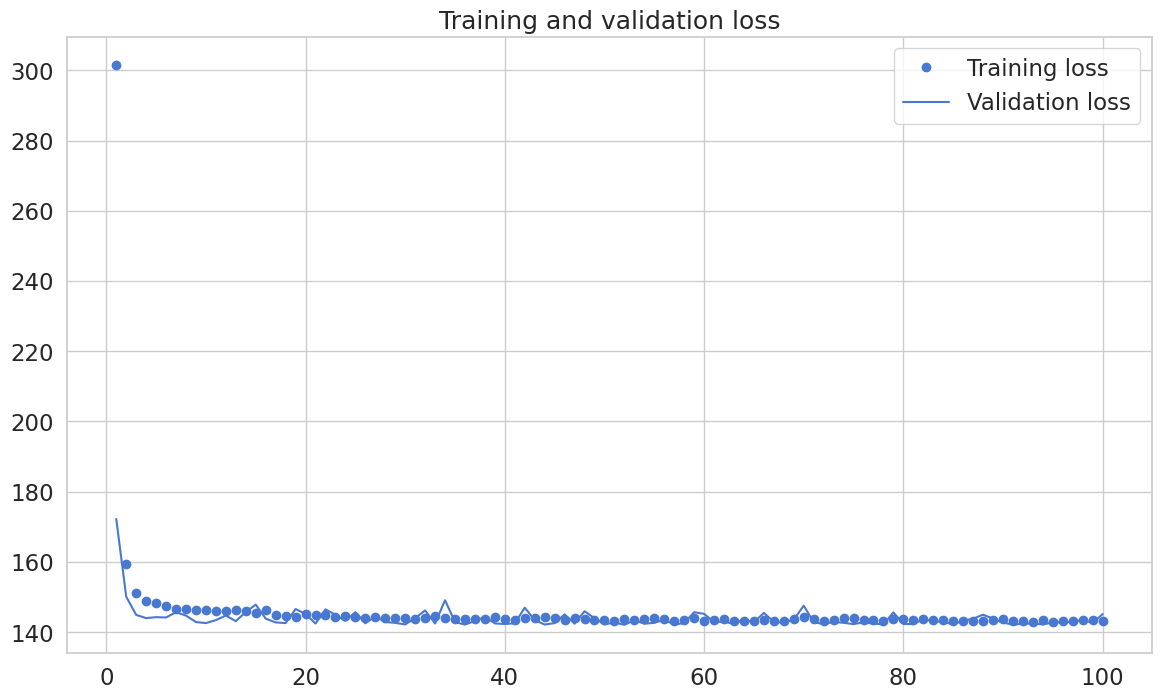

<Figure size 1400x800 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()


plt.show()

Text(0.5, 1.0, 'Crime forecasting')

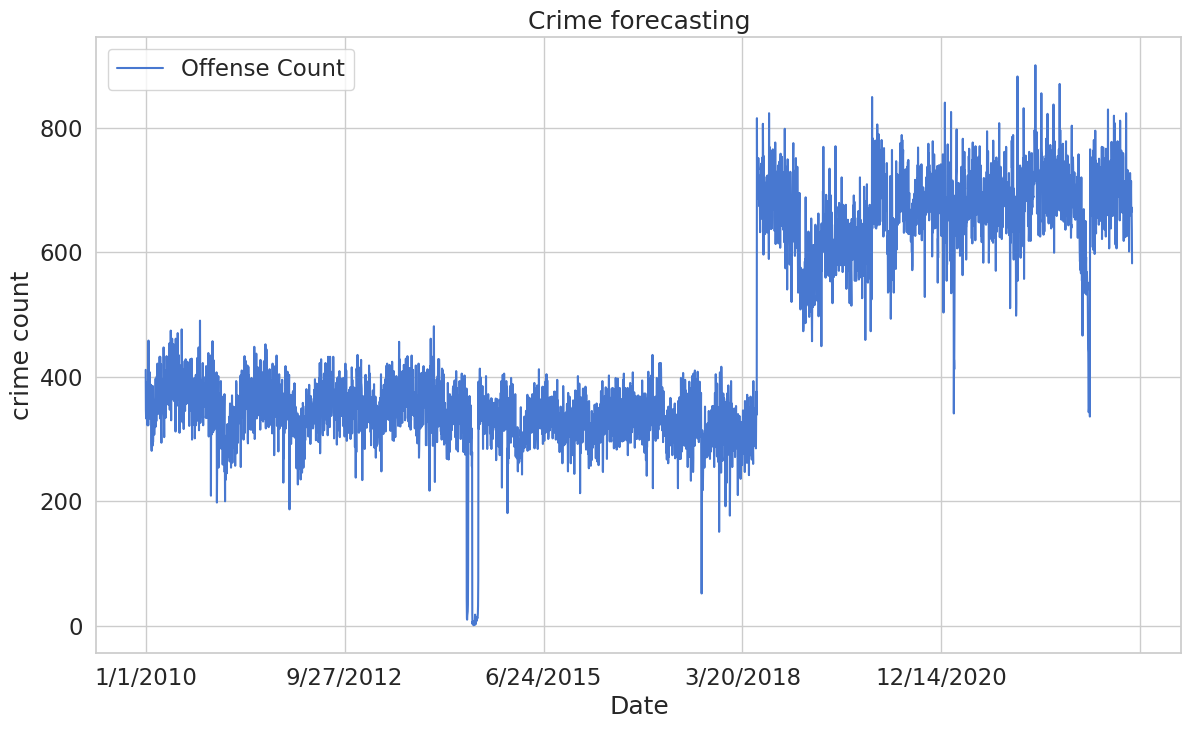

In [ ]:
%matplotlib inline
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

rcParams['figure.figsize'] = 14, 8
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
#result_new["date"]=pd.to_datetime(result_new["datetime"], unit='ms')
# data plot
ax = result_new.plot(x='datetime', y='Offense Count');
ax.set_xlabel('Date')
ax.set_ylabel('crime count')
ax.set_title('Crime forecasting')

16/16 [==============================] - 0s 6ms/step


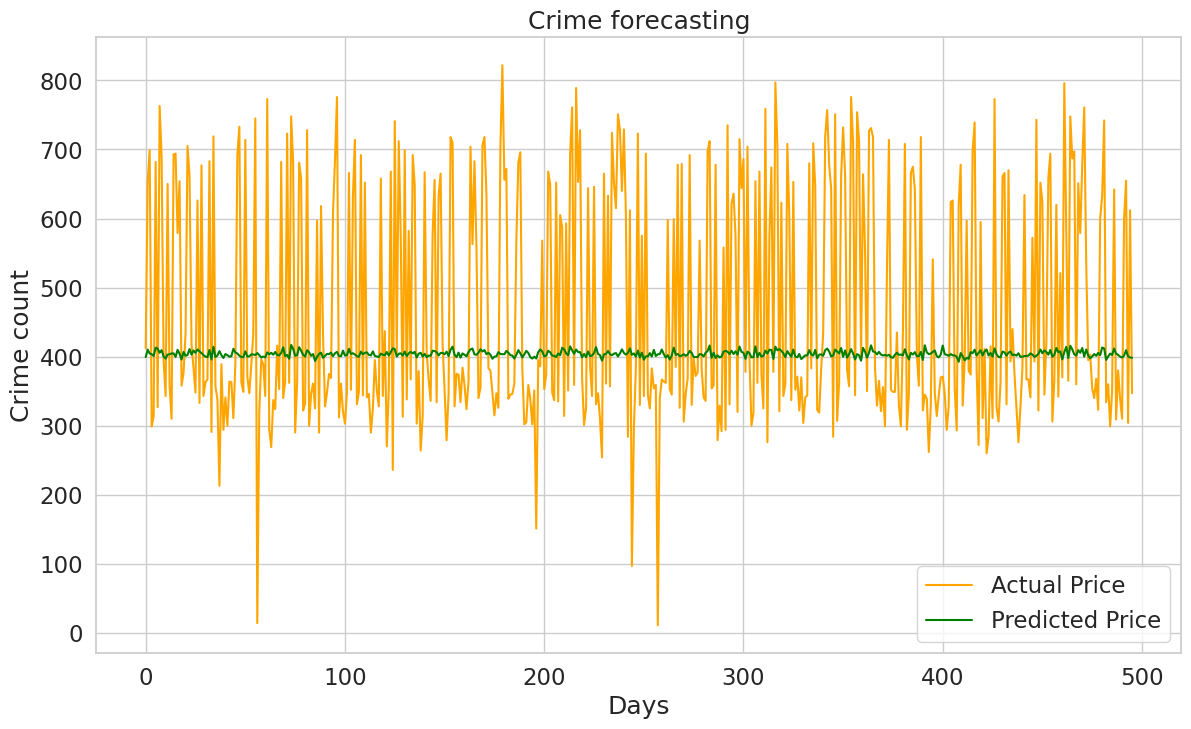

In [ ]:
y_pred = model.predict(X_test)
y_pred=y_pred.reshape(-1, y_pred.shape[-1])
# invert the scaler to get the absolute price data
#y_test_orig = scaler.inverse_transform(y_test)
#y_pred_orig = scaler.inverse_transform(y_pred)

# plots of prediction against actual data
plt.plot(y_test, label='Actual Price', color='orange')
plt.plot(y_pred, label='Predicted Price', color='green')

plt.title('Crime forecasting')
plt.xlabel('Days')
plt.ylabel('Crime count')
plt.legend(loc='best')

plt.show();

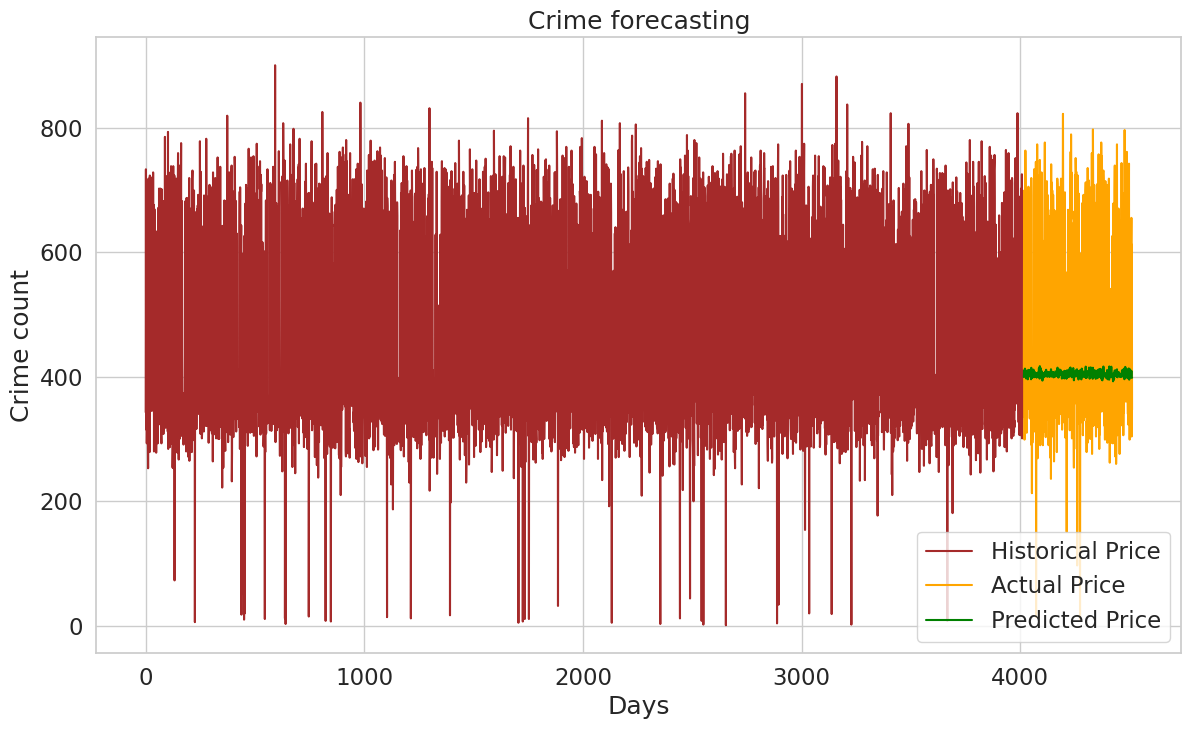

In [ ]:
# plot for whole range of data
plt.plot(np.arange(0, len(y_train)), y_train, color='brown', label='Historical Price')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, color='orange', label='Actual Price')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_pred)), y_pred, color='green', label='Predicted Price')

plt.title('Crime forecasting')
plt.xlabel('Days')
plt.ylabel('Crime count')
plt.legend()
plt.show();